In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df['month'] = pd.DatetimeIndex(df['date']).month
dfsalary= df.groupby(['customer_id','month','movement','account','first_name','gender','age','balance','time'])['amount'].sum().reset_index(name='Sum(Amount)')

In [4]:
credit =  dfsalary['movement']=='credit'
creditdf = dfsalary[credit]
creditdf=creditdf.groupby('customer_id').agg({'Sum(Amount)' : lambda x:x.mode()}).reset_index()
creditdf['Annual Salary']=creditdf['Sum(Amount)']*12
creditdf.head()

,customer_id,Sum(Amount),Annual Salary
0,CUS-1005756958,970.47,11645.64
1,CUS-1117979751,3578.65,42943.80
2,CUS-1140341822,1916.51,22998.12
3,CUS-1147642491,1711.39,20536.68
4,CUS-1196156254,3903.73,46844.76


In [5]:
df2=dfsalary.merge(creditdf, left_on='customer_id', right_on='customer_id').reindex()

In [6]:
debit= df['movement']=='debit'
dfdebit = df[debit]
dfdebit=dfdebit.groupby(['customer_id','month'])['amount'].sum().reset_index(name='sum(debit)')
df3=df2.merge(dfdebit, left_on='customer_id', right_on='customer_id').reindex()
df3['hour'] = df3.time.apply(lambda x: x.hour)

# Age vs Annual Salary

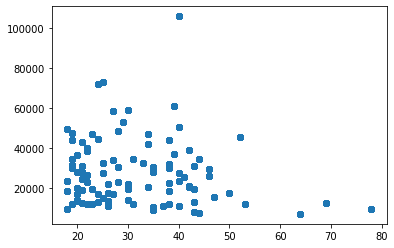

In [7]:
plt.scatter(df3['age'],df3['Annual Salary'])
plt.show()

# Balance vs Annual Salary

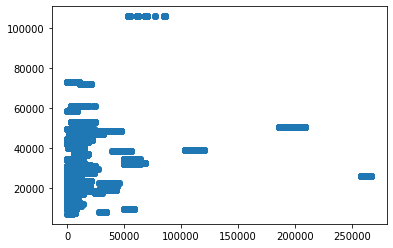

In [8]:
plt.scatter(df3['balance'],df3['Annual Salary'])
plt.show()

# Count of debits every month vs Annual Salary

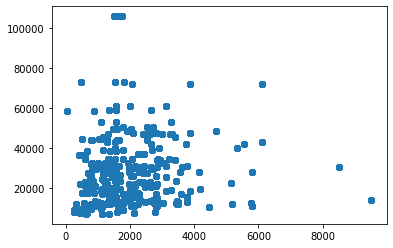

In [9]:
plt.scatter(df3['sum(debit)'],df3['Annual Salary'])
plt.show()

# Regression model for Annual Salary

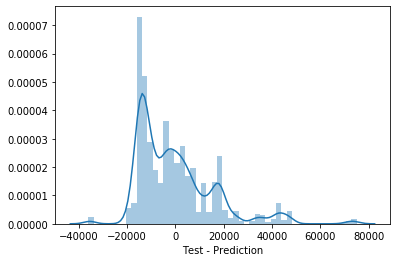

Value is: [[24975.86389442]]


In [10]:
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
X = df3[['age', 'sum(debit)','balance']]
Y = df3[['Annual Salary']]
X_train, X_test, y_train, y_test = train_test_split(X, Y)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
sb.distplot(y_test - predictions, axlabel="Test - Prediction")
plt.show()
myvals = np.array([30, 20, 3000]).reshape(1, -1)
y_pred=model.predict(myvals)
print('Value is:',y_pred) 
#accuracy_score(y_test['Annual Salary'],predictions[0], normalize=False)